# CHAPTER 4 통계분석과 기본 그래프

## 01 어제까지 몇 마리의 병아리가 부화했을까? (기초통계량)

In [1]:
import pandas as pd
hat=pd.read_csv("ch4-1.csv")
hat

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24
5,F,28
6,G,27


In [2]:
hat.head() # 위에서부터 5개 데이터 확인

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24


In [3]:
hat.tail(3) #아래에서부터 3개 데이터 확인

,hatchery,chick
4,E,24
5,F,28
6,G,27


In [7]:
hat.chick.sum() #합계

194

In [8]:
hat['chick'].sum() #합계

194

In [9]:
hat['chick'].mean()  #평균

27.714285714285715

In [10]:
hat['chick'].std() #표준편차

2.2146697055682827

In [11]:
hat['chick'].median() #중앙값

28.0

In [12]:
hat['chick'].min() #최소값

24

In [13]:
hat['chick'].max() #최대값

30

In [16]:
# 데이터 정ㄹ려하기, chick열을 기준으로 오름차순 정렬
hat.sort_values(by=['chick'],ascending=True)

,hatchery,chick
4,E,24
3,D,26
6,G,27
5,F,28
2,C,29
0,A,30
1,B,30


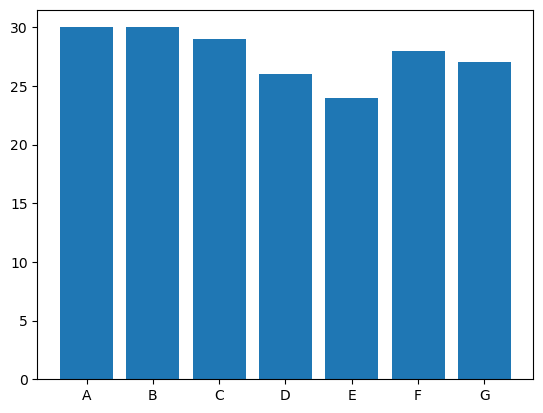

In [18]:
# 그래프용 matplotlib.pyplot 모듈 불러오기 및 plt라는 약어로 지정
import matplotlib.pyplot as plt
# 막대 그래프 그리기
plt.bar(hat['hatchery'],hat['chick'])
plt.show()

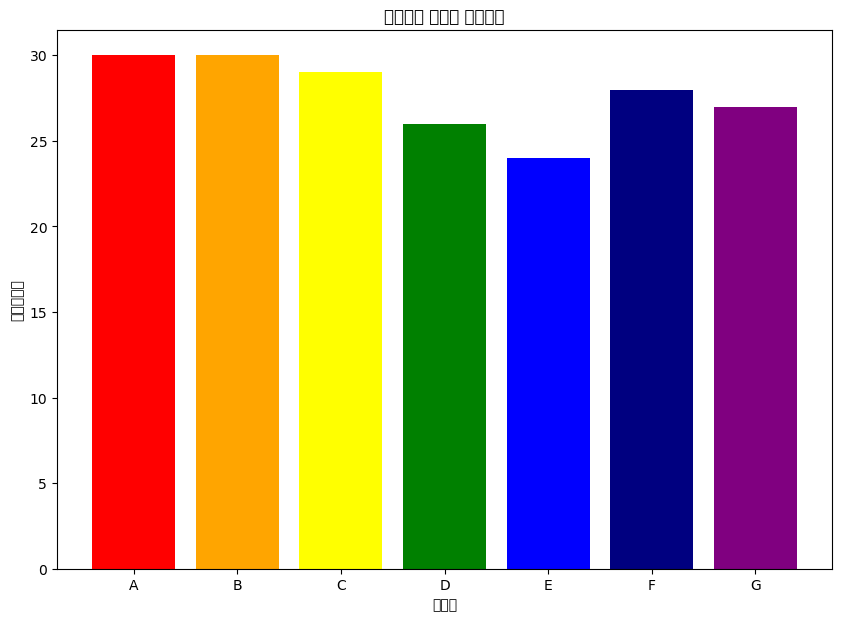

In [20]:
# 막대 그래프 그리기, 다양한 파라미터 추가
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'],hat['chick'], color=('red','orange','yellow','green','blue','navy','purple'))
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

In [21]:
# 그래프 한글 깨짐 문제 해결을 위해 맑은고딕 폰트 지정
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

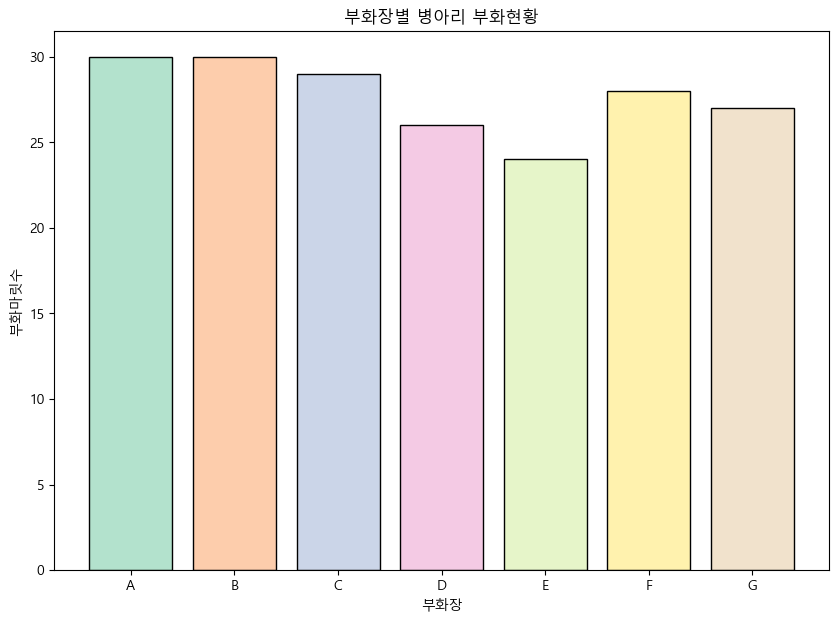

In [22]:
# 예쁜 색상 지정을 위한 seaborn 패키지 불러오기
import seaborn as sns
col7=sns.color_palette('Pastel2',7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'],hat['chick'], color=col7, edgecolor='black')
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

In [23]:
# 텍스트 추가 사용자 정의 함수 만들기
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.5, y[i], ha='center')

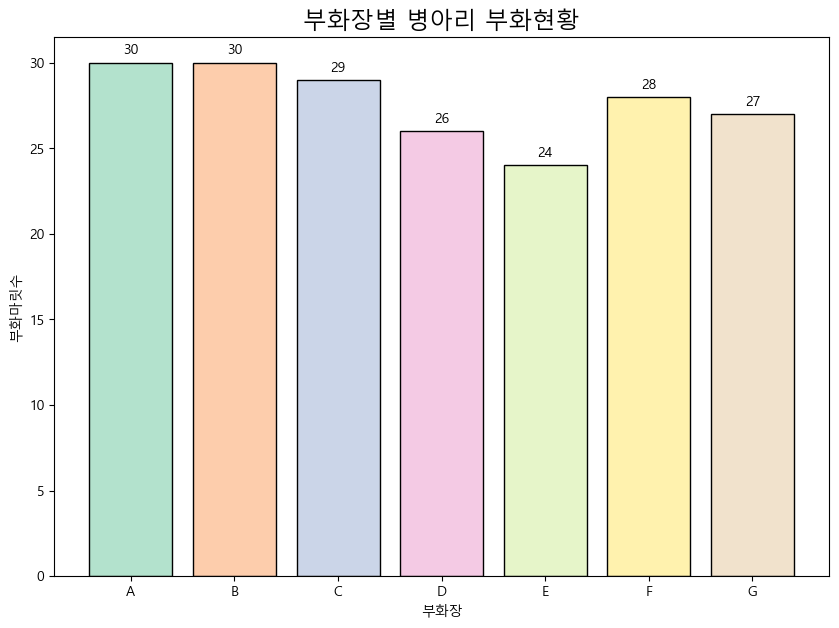

In [24]:
# 막대 위에 택스트 추가하기
col7=sns.color_palette('Pastel2',7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'],hat['chick'], color=col7, edgecolor='black')
addtext(hat['hatchery'],hat['chick']) #텍스트 표시 사용자 정의 함수 추가
plt.title('부화장별 병아리 부화현황', fontsize=17)
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

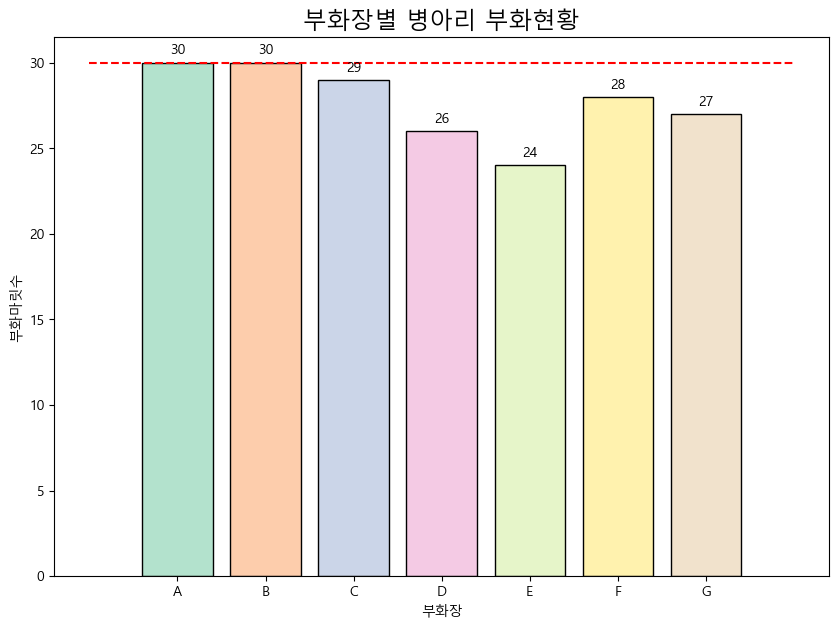

In [25]:
# 빨간색 수평선 추가하기
col7=sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor='black')
addtext(hat['hatchery'],hat['chick']) #텍스트 표시 사용자 정의 함수 추가
plt.hlines(30, -1, 7, colors='red', linestyles='dashed')
plt.title('부화장별 병아리 부화현황', fontsize=17)
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

In [26]:
# 파이 차트를 그리기 위해 비율 계산
pct=hat['chick']/hat['chick'].sum()
pct

0    0.154639
1    0.154639
2    0.149485
3    0.134021
4    0.123711
5    0.144330
6    0.139175
Name: chick, dtype: float64

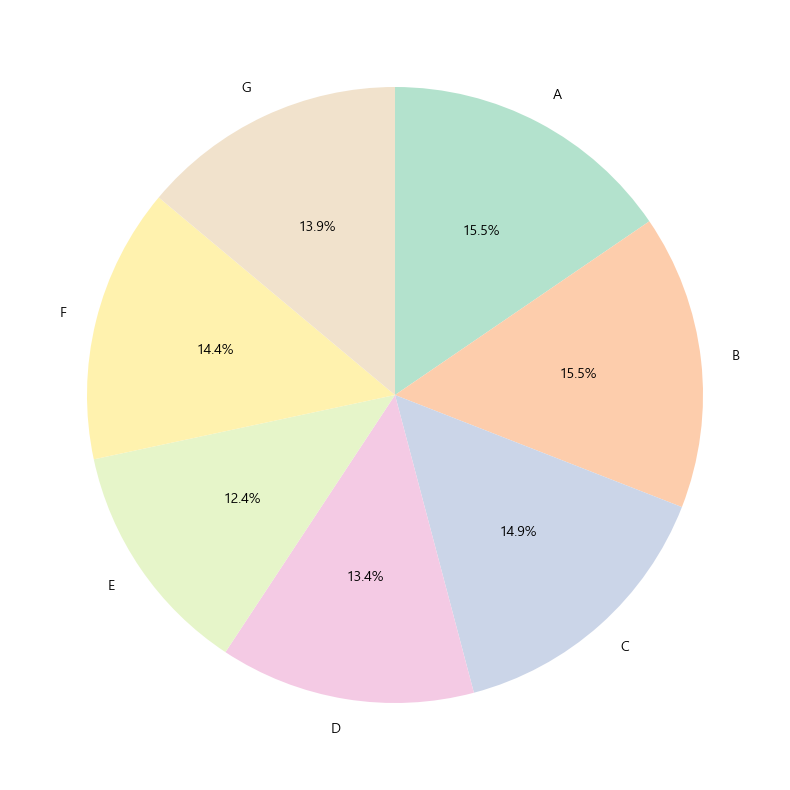

In [27]:
# 파이 차트 그리기
col7=sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10,10))
plt.pie(pct, labels=hat['hatchery'], autopct='%.1f%%', colors=col7, startangle=90, counterclock=False)
plt.show()

## 02 부화한 병아리들의 몸무게는 얼마일가? (정규분포와 중심극한정리)

In [28]:
# pandas 패키지 불러오기 및 pd라는 약어로 지정하기
import pandas as pd
b = pd.read_csv('ch4-2.csv') # b변수에 데이터 셋 입력
b.head() # 데이터 상위 5개만 확인

,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37


In [29]:
b.info() # b 데이터 셋 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes
